In [10]:
import Graphviz as Graphviz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.txt', sep = ',')


In [11]:
df.replace(['BELL','CONICAL','CONVEX','FLAT','KNOBBED','SUNKEN','FIBROUS','GROOVES','SCALY','SMOOTH','BROWN','BUFF','CINNAMON','GRAY','GREEN','PINK','PURPLE','RED','WHITE','YELLOW','BRUISES','NO','ALMOND','ANISE','CREOSOTE','FISHY','FOUL','MUSTY','NONE','PUNGENT','SPICY','ATTACHED','DESCENDING','FREE','NOTCHED','CLOSE','CROWDED','DISTANT','BROAD','NARROW','BLACK','CHOCOLATE','ORANGE','ENLARGING','TAPERING','BULBOUS','CLUB','CUP','EQUAL','RHIZOMORPHS','ROOTED','MISSING','SILKY','PARTIAL','UNIVERSAL','ONE','TWO','COBWEBBY','EVANESCENT','FLARING','LARGE','PENDANT','SHEATHING','ZONE','ABUNDANT','CLUSTERED','NUMEROUS','SCATTERED','SEVERAL','SOLITARY','GRASSES','LEAVES','MEADOWS','PATHS','URBAN','WASTE','WOODS','EDIBLE','POISONOUS'], ['b','c','x','f','k','s','f','g','y','s','n','b','c','g','r','p','u','e','w','y','t','f','a','l','c','y','f','m','n','p','s','a','d','f','n','c','w','d','b','n','k','h','o','e','t','b','c','u','e','z','r','?','k','p','u','o','t','c','e','f','l','p','s','z','a','c','n','s','v','y','g','l','m','p','u','w','d',0,1], inplace=True)

In [12]:
df.duplicated(subset=None, keep=False).value_counts()

False    7832
True      584
dtype: int64

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df1 = pd.get_dummies(df)
col_names = df1.columns.tolist()
print(df1.duplicated(col_names).value_counts())
col_names.pop(0)

False    8124
dtype: int64


'classes'

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1[col_names], df1['classes'], test_size=0.2, stratify=df1['classes'], random_state=34)


In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree_clf_2 = DecisionTreeClassifier(max_depth=2)
tree_clf_4 = DecisionTreeClassifier(max_depth=4)
tree_clf_7 = DecisionTreeClassifier(max_depth=7)
tree_clf_2.fit(X_train, y_train)
tree_clf_4.fit(X_train, y_train)
tree_clf_7.fit(X_train, y_train)
print(accuracy_score(y_test, tree_clf_2.predict(X_test)))
print(accuracy_score(y_test, tree_clf_4.predict(X_test)))
print(accuracy_score(y_test, tree_clf_7.predict(X_test)))

0.9513846153846154
0.992
1.0


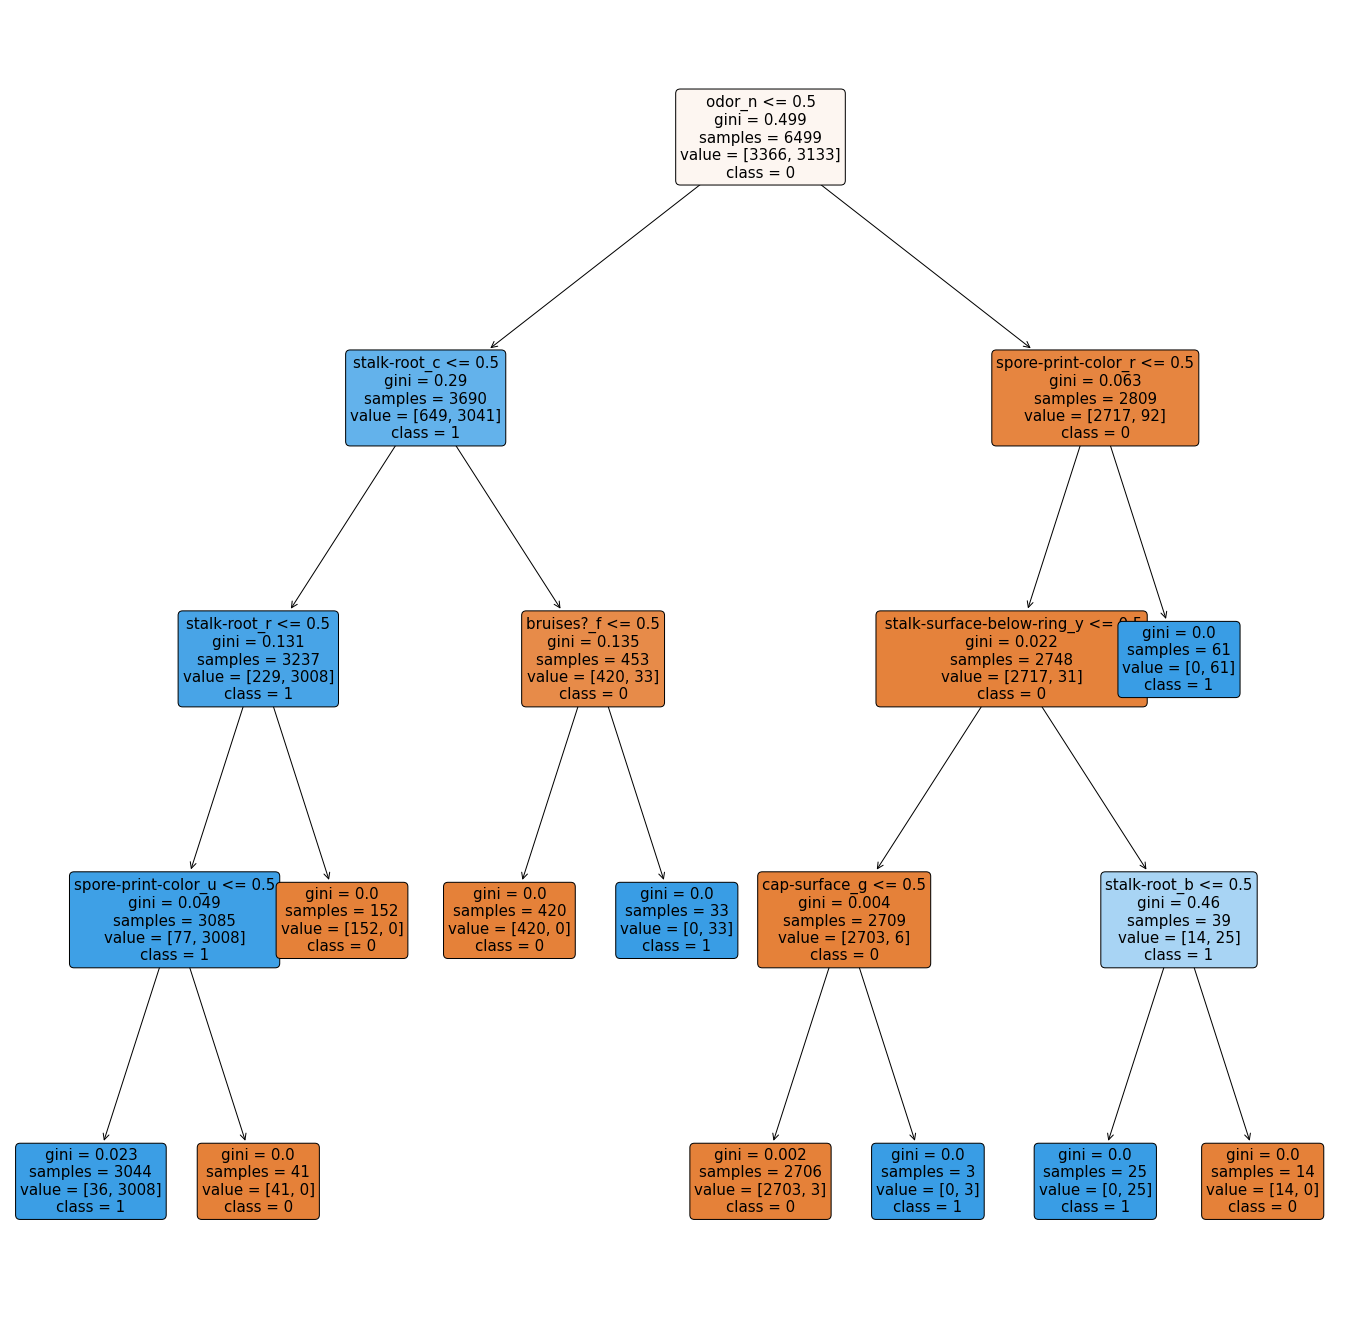

In [37]:
from sklearn import tree
plt.figure(figsize=(24,24))
tree.plot_tree(tree_clf_4,
               feature_names = col_names,
               class_names = ['0','1'],
               rounded = True,
               filled = True,
               fontsize=15)
plt.savefig('tree_4.png', dpi=100)

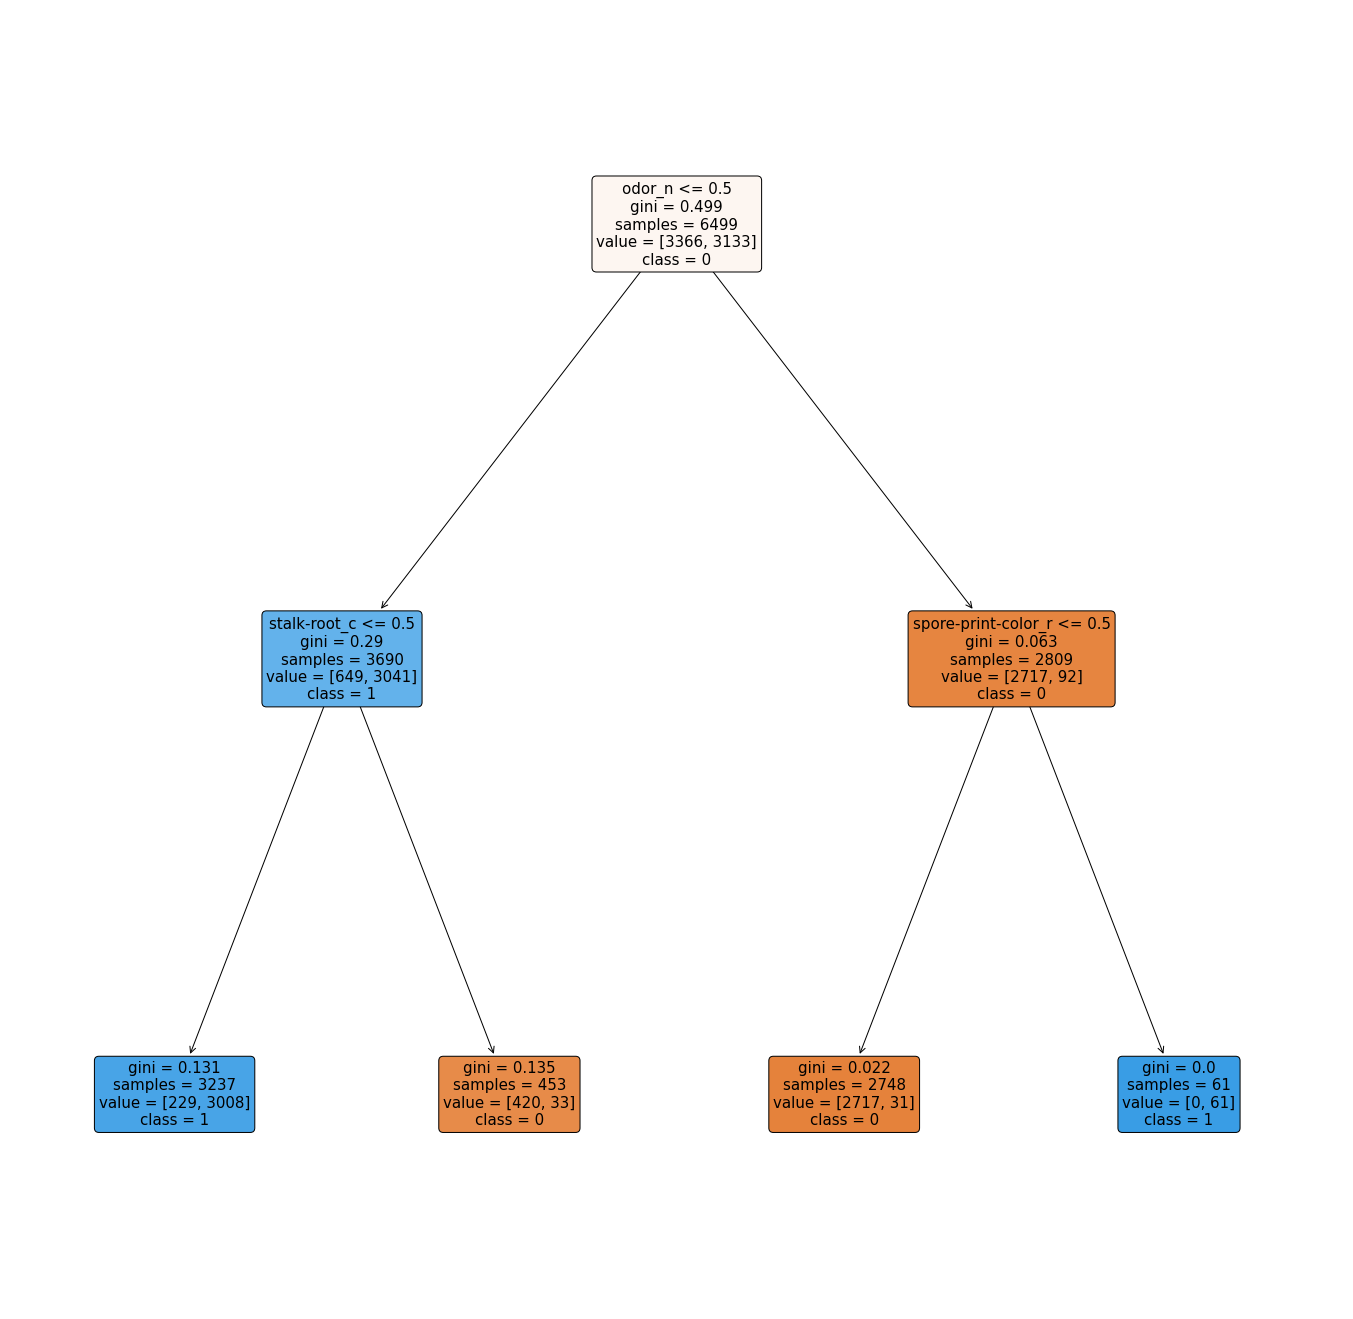

In [38]:
from sklearn import tree
plt.figure(figsize=(24,24))
tree.plot_tree(tree_clf_2,
               feature_names = col_names,
               class_names = ['0','1'],
               rounded = True,
               filled = True,
               fontsize=15)
plt.savefig('tree_2.png', dpi=100)

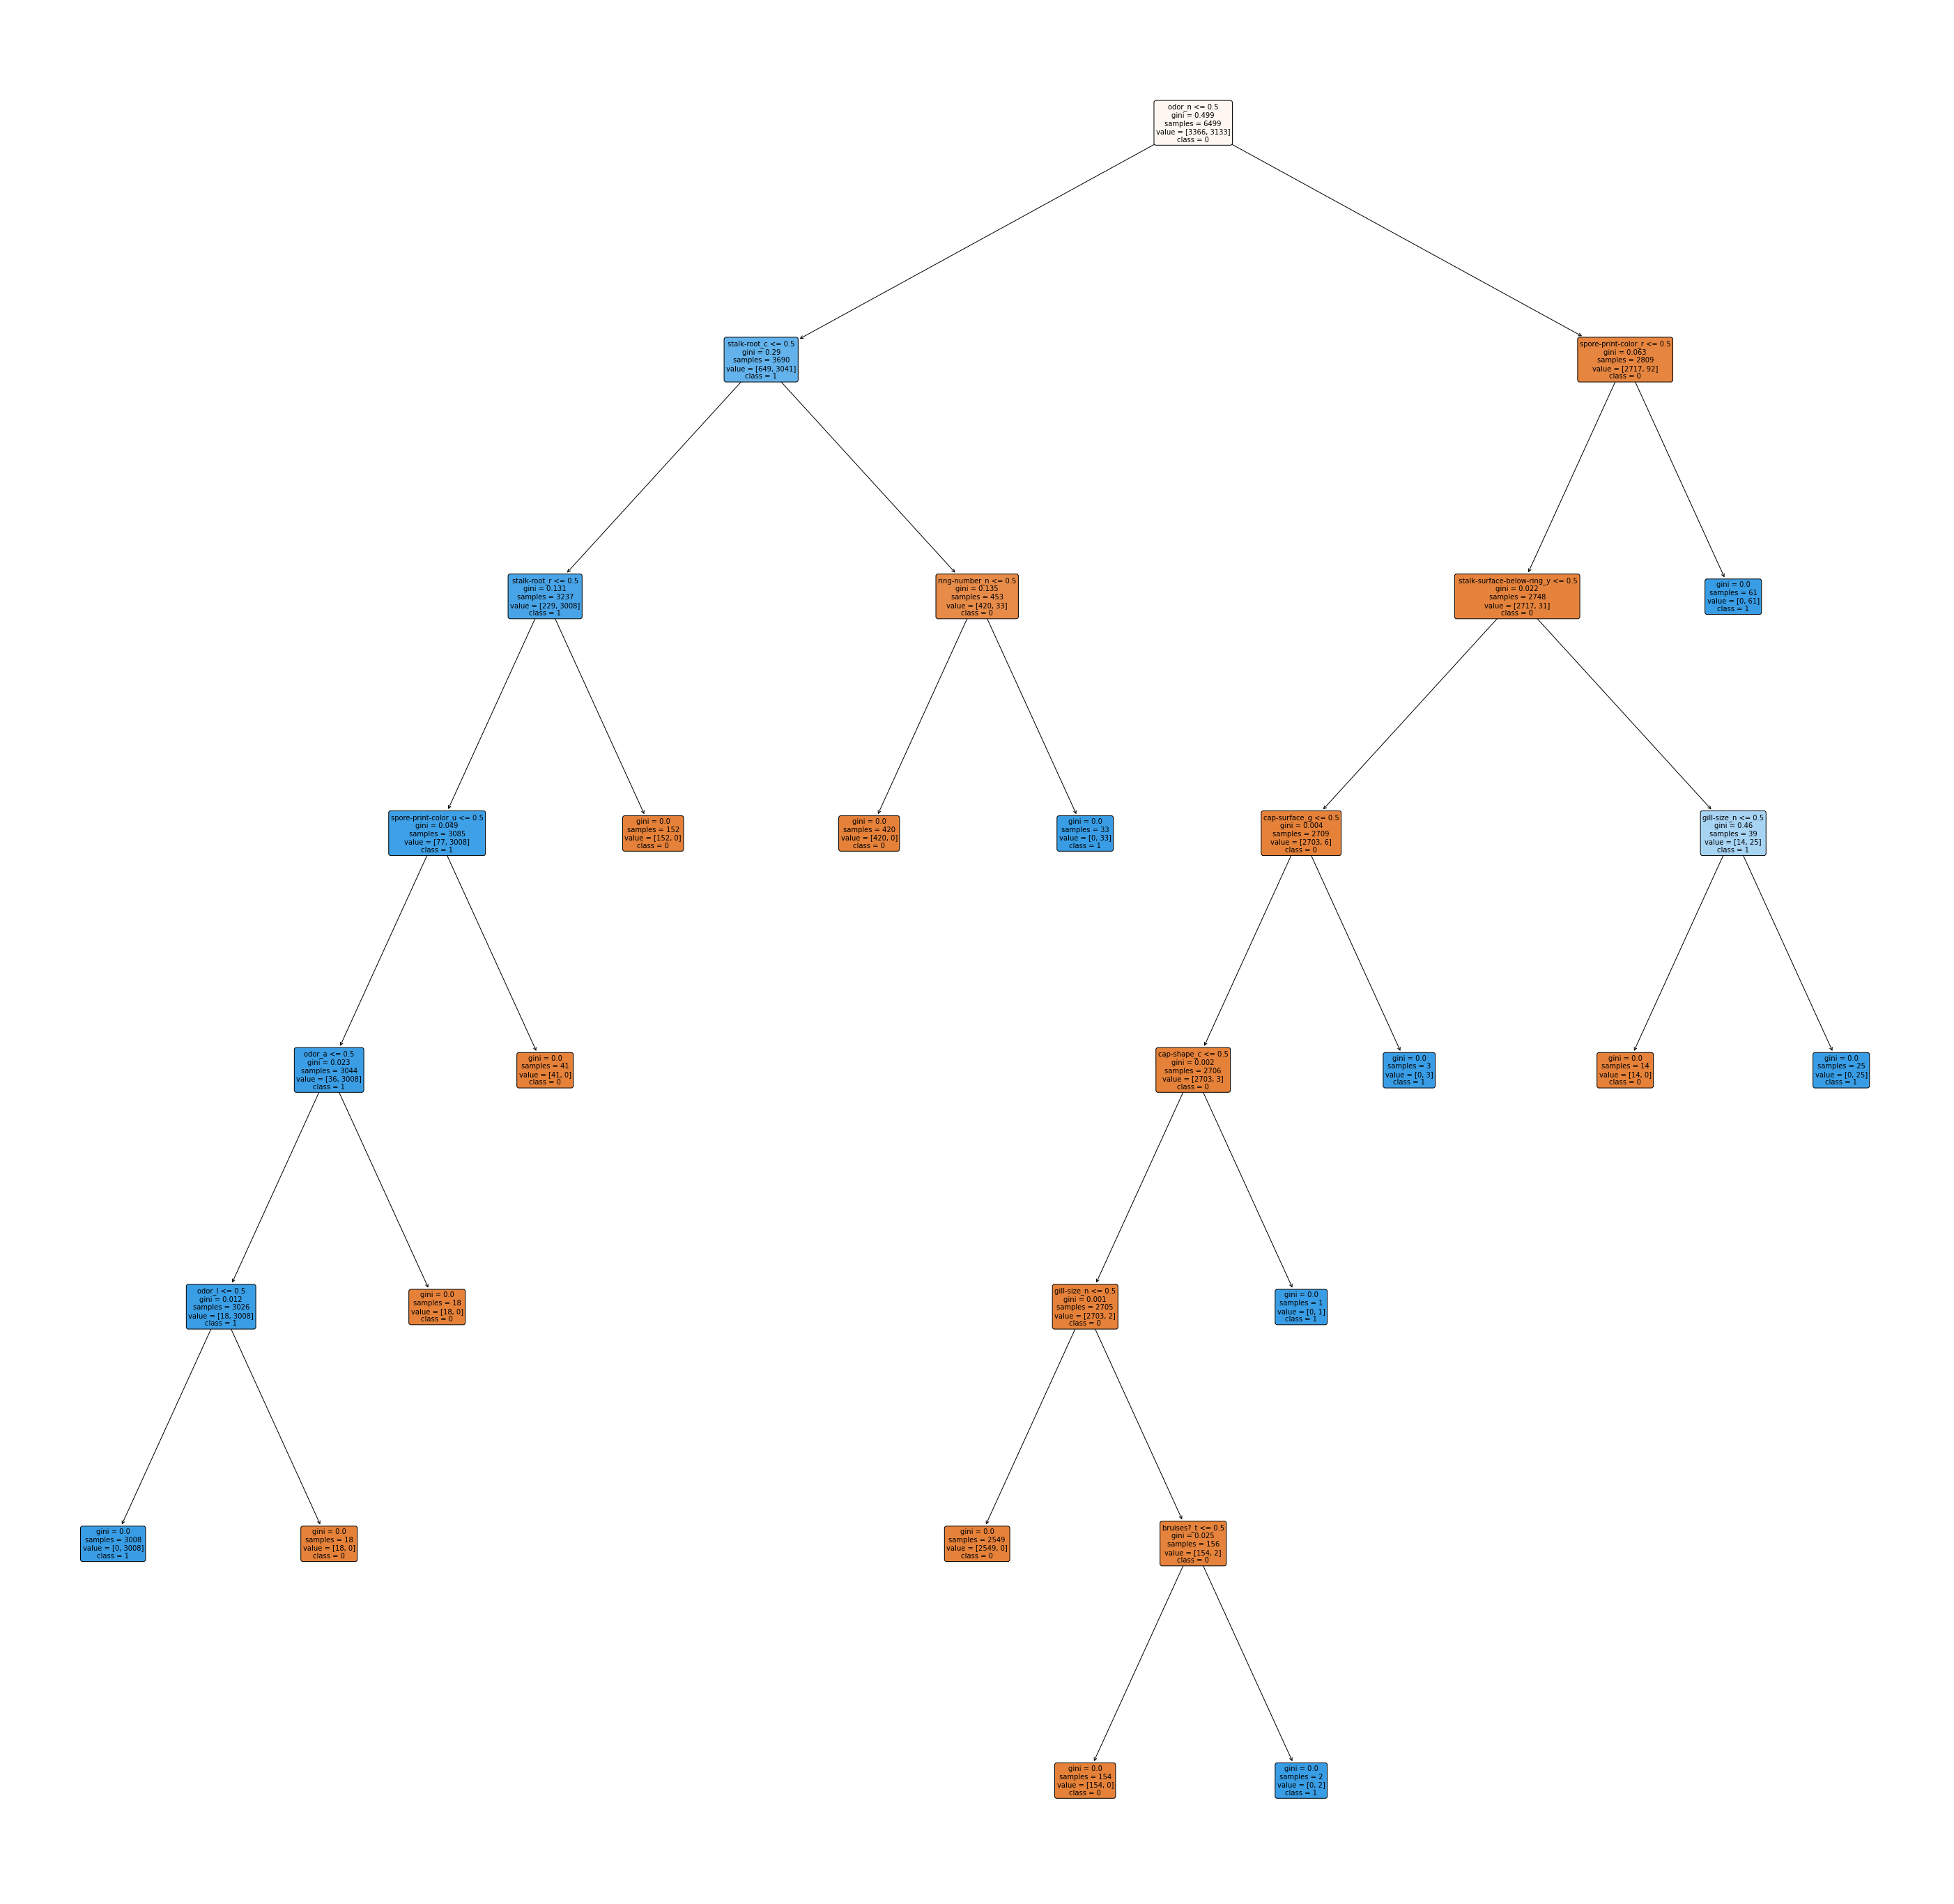

In [44]:
from sklearn import tree
plt.figure(figsize=(50,50))
tree.plot_tree(tree_clf_7,
               feature_names = col_names,
               class_names = ['0','1'],
               rounded = True,
               filled = True,
               fontsize=10)
plt.savefig('tree_7.png', dpi=100)